In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [5]:
# Read in CSV files
brands = pd.read_csv('Datasets/brands.csv')
categories = pd.read_csv('Datasets/categories.csv')
customers = pd.read_csv('Datasets/customers.csv')
order_items = pd.read_csv('Datasets/order_items.csv')
orders = pd.read_csv('Datasets/orders.csv')
products = pd.read_csv('Datasets/products.csv')
staffs = pd.read_csv('Datasets/staffs.csv')
stocks = pd.read_csv('Datasets/stocks.csv')
stores = pd.read_csv('Datasets/stores.csv')

In [6]:
# Create database connection
connection = sqlite3.connect('bike_store.db')

In [7]:
# Insert data into database
brands.to_sql('brands', connection, if_exists='replace', index=False)
categories.to_sql('categories', connection, if_exists='replace', index=False)
customers.to_sql('customers', connection, if_exists='replace', index=False)
order_items.to_sql('order_items', connection, if_exists='replace', index=False)
orders.to_sql('orders', connection, if_exists='replace', index=False)
products.to_sql('products', connection, if_exists='replace', index=False)
staffs.to_sql('staffs', connection, if_exists='replace', index=False)
stocks.to_sql('stocks', connection, if_exists='replace', index=False)
stores.to_sql('stores', connection, if_exists='replace', index=False)

3

SELECT & FROM

We want to get all the categories of bikes

In [10]:
# Run SQL query and load results into a DataFrame
query = """
SELECT 
    category_name 
FROM 
    categories;
"""

# Another weay of doing the same thing
# query = """
# SELECT 
#     * 
# FROM 
#     categories;
# """

df = pd.read_sql_query(query, connection)
df

,category_name
0,Children Bicycles
1,Comfort Bicycles
2,Cruisers Bicycles
3,Cyclocross Bicycles
4,Electric Bikes
5,Mountain Bikes
6,Road Bikes


ORDER BY, DISTINCT, LIMIT

ORDER BY allows us to order the output of the query by 1 or more columns.

In [12]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
ORDER BY
    first_name;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Aaron,Knapp
1,Abbey,Pugh
2,Abby,Gamble
3,Abram,Copeland
4,Adam,Henderson
...,...,...
1440,Zona,Cameron
1441,Zora,Ford
1442,Zoraida,Patton
1443,Zulema,Browning


In [18]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
ORDER BY
    first_name, last_name DESC;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Aaron,Knapp
1,Abbey,Pugh
2,Abby,Gamble
3,Abram,Copeland
4,Adam,Thornton
...,...,...
1440,Zona,Cameron
1441,Zora,Ford
1442,Zoraida,Patton
1443,Zulema,Clemons


In [19]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
ORDER BY
    first_name, last_name DESC
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Aaron,Knapp
1,Abbey,Pugh
2,Abby,Gamble
3,Abram,Copeland
4,Adam,Thornton


In [20]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
WHERE first_name = "Zulema" 
AND last_name = "Clemons"
OR last_name = "Pugh"
ORDER BY
    first_name, last_name DESC;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Abbey,Pugh
1,Ross,Pugh
2,Zulema,Clemons


In [21]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
WHERE first_name = "Zulema" 
AND (last_name = "Clemons"
OR last_name = "Pugh")
ORDER BY
    first_name, last_name DESC;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Zulema,Clemons


In [25]:
query = """
SELECT 
    first_name,
    last_name
FROM 
    customers
WHERE first_name = "Zulema" 
OR last_name = "Pugh"
AND last_name = "Browning"
ORDER BY
    first_name, last_name DESC;
"""

df = pd.read_sql_query(query, connection)
df

,first_name,last_name
0,Zulema,Clemons
1,Zulema,Browning


In [29]:
query = """
SELECT 
    *
FROM 
    customers
WHERE
    state NOT IN ('CA', 'NY')
AND city IN ("Houston")
AND phone IS NOT NULL
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,43,Mozelle,Carter,(281) 489-9656,mozelle.carter@aol.com,895 Chestnut Ave.,Houston,TX,77016
1,56,Lolita,Mosley,(281) 363-3309,lolita.mosley@hotmail.com,376 S. High Ridge St.,Houston,TX,77016
2,135,Dorthey,Jackson,(281) 926-8010,dorthey.jackson@msn.com,9768 Brookside St.,Houston,TX,77016
3,203,Minerva,Decker,(281) 271-6390,minerva.decker@yahoo.com,794 Greenrose Street,Houston,TX,77016
4,360,Van,Peters,(281) 658-7772,van.peters@yahoo.com,45 Fifth Dr.,Houston,TX,77016


In [33]:
query = """
SELECT *
from Products
WHERE product_name LIKE "T%"
LIMIT 5;
"""

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
2,7,Trek Slash 8 27.5 - 2016,9,6,2016,3999.99
3,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016,1799.99
4,9,Trek Conduit+ - 2016,9,5,2016,2999.99


In [42]:
query = """
SELECT COUNT(order_id) AS Total_orders , SUM(quantity) AS Total_quantity , SUM(list_price) AS Total_sales , MIN(discount) AS Max_Discount ,
AVG(list_price * (1 -discount)) AS Actual_average_selling_price
FROM order_items;
"""

df = pd.read_sql_query(query,connection)
df

,Total_orders,Total_quantity,Total_sales,Max_Discount,Actual_average_selling_price
0,4722,7078,5.726407e+06,0.05,1086.009722


In [46]:
query = """
SELECT product_id , SUM(quantity * list_price*(1-discount)) AS Total_sales
FROM order_items
GROUP BY product_id
HAVING Total_sales > 5000
ORDER BY Total_sales DESC;
"""

df = pd.read_sql_query(query,connection)
df

,product_id,Total_sales
0,7,555558.6111
1,9,389248.7025
2,4,368472.7294
3,11,226765.5510
4,56,211584.6153
...,...,...
175,135,5219.9652
176,88,5198.1264
177,161,5127.3000
178,89,5113.2565


In [53]:
query = """
SELECT * ,
CASE WHEN shipped_date > required_date THEN 1 
ELSE 0
END AS "Shipped_late",
CAST (order_status AS FLOAT) AS order_status_float
from orders;
"""

df = pd.read_sql_query(query,connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,Shipped_late,order_status_float
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,0,4.0
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,0,4.0
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,0,4.0
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,1,4.0
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,0,4.0
...,...,...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,None,2,7,0,3.0
1611,1612,3,3,2018-10-21,2018-10-21,None,1,3,0,3.0
1612,1613,1,3,2018-11-18,2018-11-18,None,2,6,0,3.0
1613,1614,135,3,2018-11-28,2018-11-28,None,3,8,0,3.0


In [68]:
query = """
SELECT *
FROM orders AS o
INNER JOIN customers AS c
ON o.customer_id = c.customer_id
LIMIT 5;
"""

df = pd.read_sql_query(query,connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,259,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,1212,Jaqueline,Cummings,None,jaqueline.cummings@hotmail.com,478 Wrangler St.,Huntington Station,NY,11746
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,523,Joshua,Robertson,None,joshua.robertson@gmail.com,81 Campfire Court,Patchogue,NY,11772
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,175,Nova,Hess,None,nova.hess@msn.com,773 South Lafayette St.,Duarte,CA,91010
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,1324,Arla,Ellis,None,arla.ellis@yahoo.com,127 Crescent Ave.,Utica,NY,13501


In [67]:
query = """
SELECT *
FROM orders AS o
FULL JOIN customers AS c
ON o.customer_id = c.customer_id
LIMIT 5;
"""

df = pd.read_sql_query(query,connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,259,Johnathan,Velazquez,None,johnathan.velazquez@hotmail.com,9680 E. Somerset Street,Pleasanton,CA,94566
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,1212,Jaqueline,Cummings,None,jaqueline.cummings@hotmail.com,478 Wrangler St.,Huntington Station,NY,11746
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,523,Joshua,Robertson,None,joshua.robertson@gmail.com,81 Campfire Court,Patchogue,NY,11772
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,175,Nova,Hess,None,nova.hess@msn.com,773 South Lafayette St.,Duarte,CA,91010
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,1324,Arla,Ellis,None,arla.ellis@yahoo.com,127 Crescent Ave.,Utica,NY,13501


In [79]:
query = """
SELECT o1.customer_id , MAX(o1.order_date) AS Recent_Order , MAX(o2.order_date) AS Second_Most_recent_order
FROM orders AS o1
INNER JOIN orders AS o2
ON o1.customer_id = o2.customer_id
WHERE o1.order_date > o2.order_date
GROUP BY o1.customer_id;
"""

df = pd.read_sql_query(query,connection)
df

,customer_id,Recent_Order,Second_Most_recent_order
0,1,2018-11-18,2018-04-18
1,2,2018-04-09,2017-08-21
2,3,2018-10-21,2018-04-06
3,4,2018-04-18,2017-11-21
4,5,2018-04-17,2016-11-24
...,...,...,...
126,231,2018-04-26,2017-12-14
127,233,2018-04-13,2017-06-03
128,237,2018-04-08,2016-04-11
129,239,2018-04-29,2017-08-09


In [82]:
query = """
SELECT *
FROM products
WHERE model_year = 2017
UNION 
Select *
FROM products
WHERE model_year = 2019;
"""

df = pd.read_sql_query(query,connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,27,Surly Big Dummy Frameset - 2017,8,6,2017,999.99
1,28,Surly Karate Monkey 27.5+ Frameset - 2017,8,6,2017,2499.99
2,29,Trek X-Caliber 8 - 2017,9,6,2017,999.99
3,30,Surly Ice Cream Truck Frameset - 2017,8,6,2017,999.99
4,31,Surly Wednesday - 2017,8,6,2017,1632.99
...,...,...,...,...,...,...
86,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
87,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
88,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
89,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [85]:
query = """
SELECT *
FROM products
WHERE list_price > (
    SELECT AVG(list_price) AS avg_lp
    FROM products
    WHERE model_year = 2017);
"""

df = pd.read_sql_query(query,connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
1,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
2,7,Trek Slash 8 27.5 - 2016,9,6,2016,3999.99
3,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016,1799.99
4,9,Trek Conduit+ - 2016,9,5,2016,2999.99
...,...,...,...,...,...,...
117,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
118,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
119,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
120,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [86]:
query = """
SELECT 
    DISTINCT
    order_id,
    customer_id
FROM 
    orders
WHERE
    order_id IN (
                  SELECT
                      DISTINCT
                      order_id
                  FROM
                      order_items
                  INNER JOIN
                      products
                  ON
                      order_items.product_id = products.product_id
                  AND
                      brand_id = 9
                  AND
                      discount >= .20
                 );
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id
0,1,259
1,16,552
2,19,696
3,28,252
4,29,437
...,...,...
293,1601,43
294,1602,55
295,1605,123
296,1610,15


In [93]:
query = """
SELECT 
    DISTINCT
    order_id,
    customer_id
FROM 
    orders
WHERE
    EXISTS (
            SELECT
                1
            FROM
                order_items
            WHERE
                discount >= .20
            AND
                order_items.order_id = orders.order_id
            );
"""

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id
0,1,259
1,11,1326
2,15,450
3,16,552
4,17,1175
...,...,...
855,1610,15
856,1611,6
857,1612,3
858,1614,135


In [95]:
query = """
WITH category_sales AS (
    SELECT
        DISTINCT
        order_id,
        order_items.product_id,
        quantity,
        order_items.list_price,
        quantity * order_items.list_price AS line_subtotal,
        category_id
    FROM
        order_items
    INNER JOIN
        products
    ON
        order_items.product_id = products.product_id
        
)

SELECT
    category_id,
    SUM(line_subtotal) AS revenue,
    SUM(quantity) AS units_sold,
    COUNT(DISTINCT order_id) AS total_orders
FROM 
    category_sales
GROUP BY
    category_id
ORDER BY
    revenue DESC;
"""

df = pd.read_sql_query(query, connection)
df

,category_id,revenue,units_sold,total_orders
0,6,3030775.71,1755,866
1,7,1852555.60,559,315
2,3,1109151.04,2063,959
3,5,1020236.85,315,202
4,4,799874.60,394,245
5,2,438506.87,813,472
6,1,327888.21,1179,635


In [98]:
query = """
WITH RECURSIVE employee_hierarchy AS (
    SELECT
        staff_id,
        manager_id,
        first_name || ' ' || last_name AS full_name
    FROM
        staffs t1
    WHERE
        manager_id IS NULL
    UNION ALL
    SELECT
        t2.staff_id,
        t2.manager_id,
        t2.first_name || ' ' || t2.last_name AS full_name
    FROM
        staffs t2
    INNER JOIN
        employee_hierarchy eh
    ON
        t2.manager_id = eh.staff_id  
)

SELECT
    *
FROM
    employee_hierarchy;
"""

df = pd.read_sql_query(query, connection)
df

,staff_id,manager_id,full_name
0,1,NaN,Fabiola Jackson
1,2,1.0,Mireya Copeland
2,5,1.0,Jannette David
3,8,1.0,Kali Vargas
4,3,2.0,Genna Serrano
5,4,2.0,Virgie Wiggins
6,6,5.0,Marcelene Boyer
7,7,5.0,Venita Daniel
8,9,7.0,Layla Terrell
9,10,7.0,Bernardine Houston


In [112]:
query = """
WITH daily_orders AS (
    SELECT
        order_date,store_id,COUNT(*) AS orders
    FROM
        orders
    GROUP BY
        order_date, store_id
)
SELECT
    order_date,
    store_id,
    SUM(orders) OVER(PARTITION BY store_id 
                     ORDER BY order_date ASC
                     ROWS BETWEEN 14 PRECEDING AND 15 FOLLOWING) AS moving_avg_30d
FROM
    daily_orders;
"""

df = pd.read_sql_query(query, connection)
df

,order_date,store_id,moving_avg_30d
0,2016-01-01,1,20
1,2016-01-03,1,21
2,2016-01-05,1,22
3,2016-01-06,1,23
4,2016-01-09,1,24
...,...,...,...
1049,2018-04-29,3,23
1050,2018-07-01,3,22
1051,2018-07-10,3,21
1052,2018-11-28,3,19


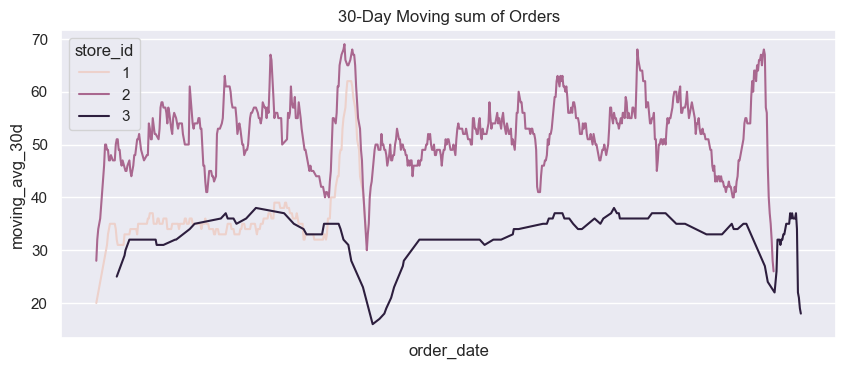

In [116]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=df, x='order_date', y='moving_avg_30d', hue='store_id', ax=ax)
ax.set_xticks([])
# ax.set_yticks([])
# ax.set_ylabel('')
# ax.set_xlabel('')
ax.set_title('30-Day Moving sum of Orders')
plt.savefig("30-Day Moving sum of Orders")